In [1]:
%load_ext autoreload
%autoreload 2

import torch
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
from torch_tools.visualization import to_image
from visualization import interpolate
from loading import load_from_dir
%matplotlib inline


deformator, G, shift_predictor = load_from_dir(
    './models/pretrained/deformators/BigGAN_CIFAR10/',
    G_weights='./models/pretrained/generators/BigGAN_CIFAR10/model=G-best-weights-step=392000.pth')

# deformator, G, shift_predictor = load_from_dir(
#     './models/pretrained/deformators/SN_MNIST/',
#     G_weights='./models/pretrained/generators/SN_MNIST/')
# deformator, G, shift_predictor = load_from_dir(
#     './models/pretrained/deformators/SN_Anime/',
#     G_weights='./models/pretrained/generators/SN_Anime/')

# deformator, G, shift_predictor = load_from_dir(
#     './models/pretrained/deformators/BigGAN/',
#     G_weights='./models/pretrained/generators/BigGAN/G_ema.pth')

# deformator, G, shift_predictor = load_from_dir(
#     './models/pretrained/deformators/ProgGAN/',
#     G_weights='./models/pretrained/generators/ProgGAN/100_celeb_hq_network-snapshot-010403.pth')

# deformator, G, shift_predictor = load_from_dir(
#     './models/pretrained/deformators/StyleGAN2/',
#     G_weights='./models/pretrained/generators/StyleGAN2/stylegan2-ffhq-config-f.pt')

# discovered_annotation = ''
# for d in deformator.annotation.items():
#     discovered_annotation += '{}: {}\n'.format(d[0], d[1])
# print('human-annotated directions:\n' + discovered_annotation)

潜空间维度： 80
变形方向个数维度： None
输出，潜空间维度： None


E:\anaconda\anaconda3\envs\latentspace\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
E:\anaconda\anaconda3\envs\latentspace\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


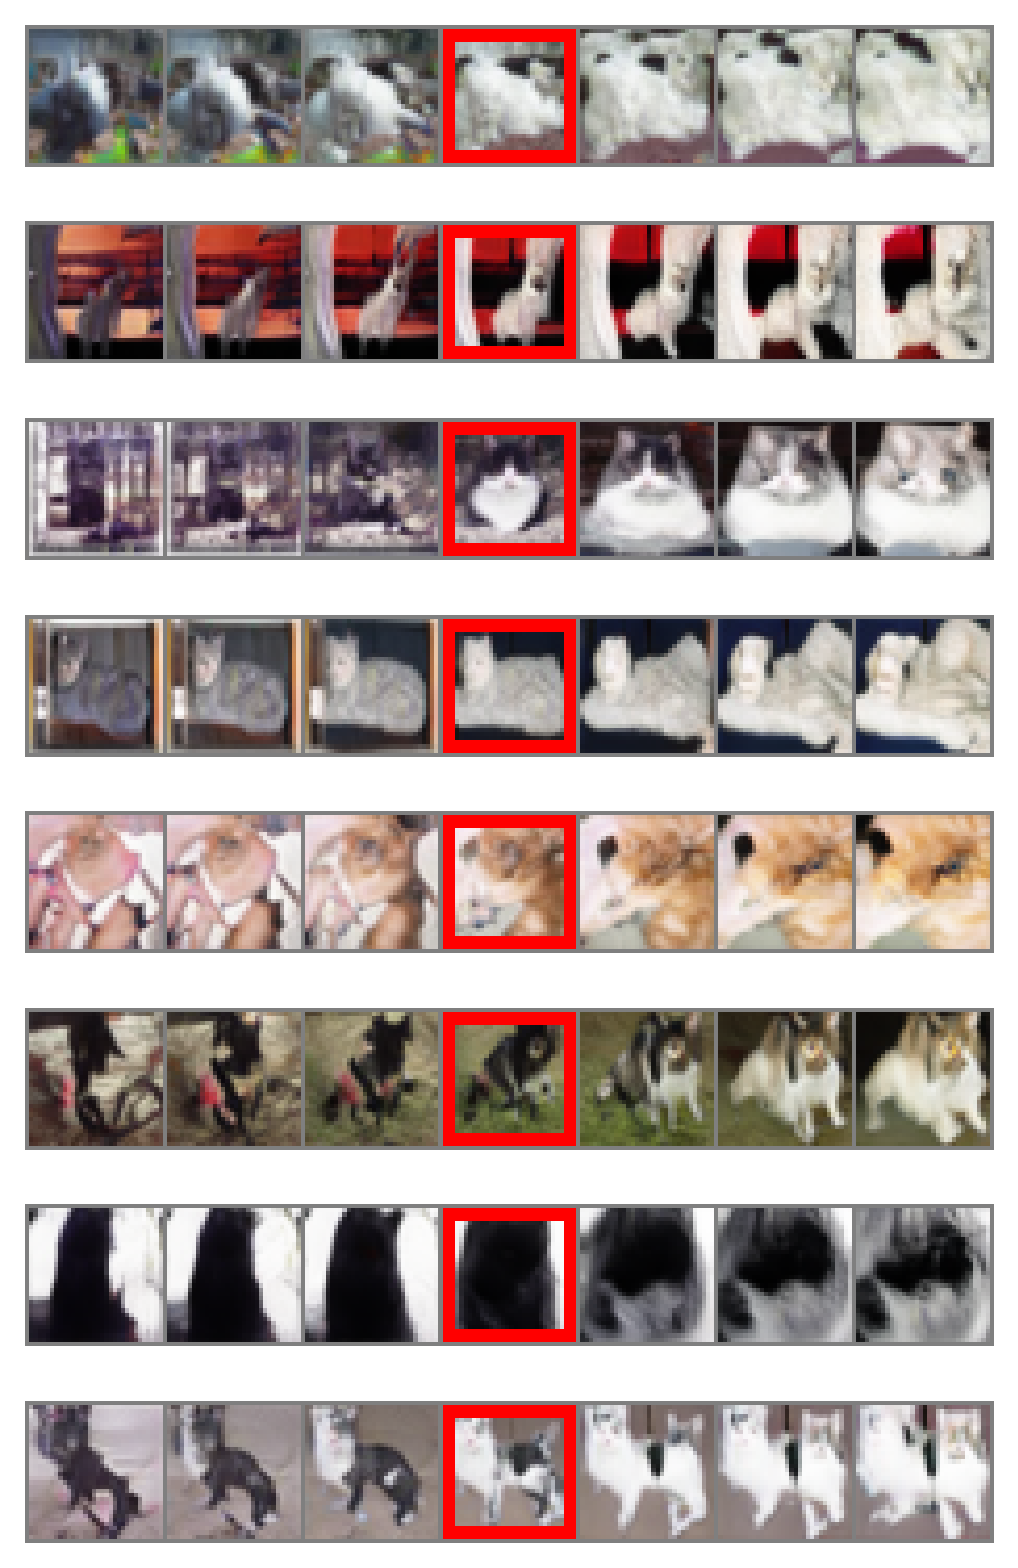

In [11]:
from utils import is_conditional

rows = 8
plt.figure(figsize=(5, rows), dpi=250)

# set desired class for conditional GAN
if is_conditional(G):
    G.set_classes(4)

# annotated = list(deformator.annotation.values())
# 69，70缩放
inspection_dim = 70
zs = torch.randn([rows, G.dim_z] if type(G.dim_z) == int else [rows] + G.dim_z, device='cuda')


for z, i in zip(zs, range(rows)):
    interpolation_deformed = interpolate(
        G, z.unsqueeze(0),
        shifts_r=9,
        shifts_count=3,
        dim=inspection_dim,
        deformator=deformator,
        with_central_border=True)

    plt.subplot(rows, 1, i + 1)
    plt.axis('off')
    grid = make_grid(interpolation_deformed, nrow=11, padding=1, pad_value=0.0)
    grid = torch.clamp(grid, -1, 1)

    plt.imshow(to_image(grid))